In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16  as pretrainedModel , preprocess_input

In [4]:
from tensorflow.keras.layers import Flatten, Dense
from keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

In [4]:
# train_path = '/content/drive/MyDrive/data_set/data/train'
# valid_path = '/content/drive/MyDrive/data_set/data/test'

In [9]:
train_path = 'data/train'
valid_path = 'data/test'

In [11]:
from glob import glob
imageFiles = glob( train_path + '/*/*.jpeg')
validFiles = glob( valid_path + '/*/*.jpeg')
imageFiles

['data/train\\ill\\1.jpeg',
 'data/train\\ill\\2.jpeg',
 'data/train\\ill\\3.jpeg',
 'data/train\\ill\\4.jpeg',
 'data/train\\ill\\5.jpeg',
 'data/train\\ill\\6.jpeg',
 'data/train\\normal\\1.jpeg',
 'data/train\\normal\\2.jpeg',
 'data/train\\normal\\3.jpeg',
 'data/train\\normal\\4.jpeg',
 'data/train\\normal\\5.jpeg',
 'data/train\\normal\\6.jpeg']

In [13]:
import numpy as np
import matplotlib.pyplot as plt

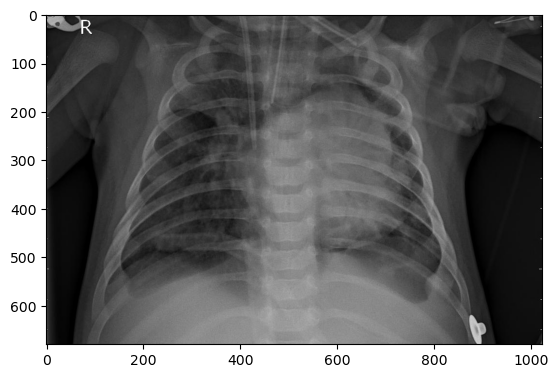

In [15]:
plt.imshow(image.load_img(np.random.choice(imageFiles)))

In [21]:
image_size= [50,50]    # minimum: 32*32

In [25]:
## this cell use in colab environment

# ptm = pretrainedModel(
#     input_shape = image_size + [3],
#     weights= 'imagenet',
#     include_top = False
# )

In [27]:
from tensorflow.keras.applications import VGG16  

ptm = VGG16(
    input_shape=image_size + [3],  # (50, 50, 3)
    weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 
    include_top=False
)

In [29]:
ptm.trainable = False

In [31]:
folders = glob(train_path + '/*')
folders

['data/train\\ill', 'data/train\\normal']

In [33]:
k = len(folders)

In [35]:
x = Flatten()(ptm.output)
x = Dense(k, activation = 'softmax')(x)
model = Model (inputs = ptm.input, outputs = x)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function= preprocess_input
)

In [39]:
batchsize = 128

In [41]:
train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize
)

Found 12 images belonging to 2 classes.


In [43]:
valid_generator = gen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size= image_size,
    batch_size= batchsize
)

Found 12 images belonging to 2 classes.


In [45]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',  metrics = ['accuracy'])

In [53]:
r = model.fit(train_generator, validation_data= valid_generator, epochs =10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 5.2307 - val_accuracy: 0.4167 - val_loss: 6.5240
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 4.7491 - val_accuracy: 0.5833 - val_loss: 6.4902
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 3.8796 - val_accuracy: 0.3333 - val_loss: 5.4777
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 5.6476 - val_accuracy: 0.5833 - val_loss: 4.8140
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 4.2573 - val_accuracy: 0.5000 - val_loss: 4.3276
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 3.6285 - val_accuracy: 0.5833 - val_loss: 5.4065
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5833 - loss: 4.1528 - val_accuracy: 0.5000 - val_loss: 3.2059
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 3.4819 - val_accuracy: 0.7500 - val_loss: 0.4420
Epoch 9/10
1/1 ━

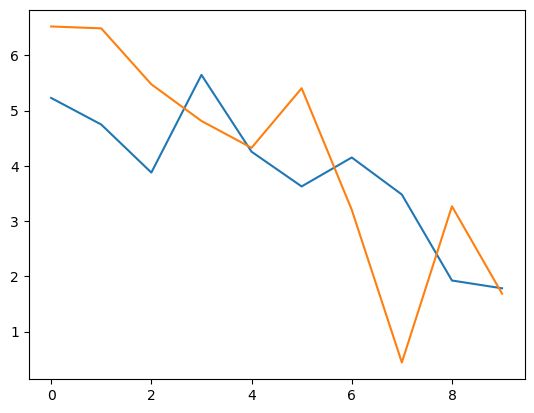

In [54]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

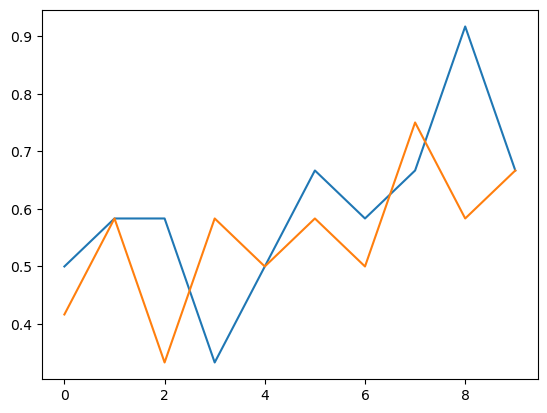

In [55]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')